### Статистичний аналіз даних
**Мета роботи:**
Ознайомитись з основними функціями бібліотеки NumPy та
SciPy для описової статистики, перевірки статистичних гіпотез, кореляційного
аналізу та лінійної регресії.

Варіант 3.  
Файл possum.csv.
1. Знайти розмір, який не перевищують очі 25% опосумів.
2. Перевірити чи нормально розподілена довжина тіла.
3. Чи є зв’язок між довжиною тіла і віком опосума?
4. Чи відрізняється загальна довжина тіла опосумів Вікторії та інших
провінцій?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('possum.csv')
display(data)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


### 1. Знайти розмір, який не перевищують очі 25% опосумів.

In [3]:
possums_eye_size = data['eye']
possums_eye_size.quantile(0.25)

14.4

### 2. Перевірити чи нормально розподілена довжина тіла.

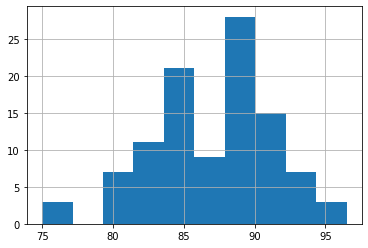

NormaltestResult(statistic=1.5019577611029806, pvalue=0.47190438854803596)

In [4]:
possums_total_length = data['totlngth']
possums_total_length.hist()
plt.show()
stats.normaltest(possums_total_length)

`pvalue > 0.05`, отже **довжина тіла має нормальний розподіл**

### 3. Чи є зв’язок між довжиною тіла і віком опосума?

In [5]:
data.fillna(inplace=True, value={'totlngth': data.totlngth.mean(), 'age': data.age.mean()})
dp = data.totlngth

In [6]:
stats.pearsonr(data.totlngth, data.age)

(0.25097031062591957, 0.010177518719021523)

In [7]:
data = pd.read_csv('possum.csv')
data.dropna(subset=['totlngth', 'age'], inplace=True)

In [8]:
stats.pearsonr(data.totlngth, data.age)

(0.2602802985765305, 0.008241652040941617)

Коефіціент кореляції < 0.5, а p значення < 0.05.  
**Кореляції між між довжиною тіла і віком опосума немає**

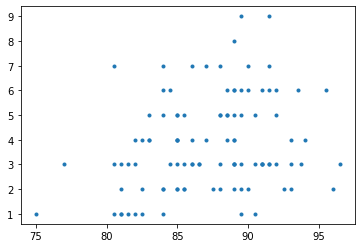

In [13]:
plt.plot(data.totlngth, data.age, linestyle="None", marker=".")

### 4. Чи відрізняється загальна довжина тіла опосумів Вікторії та інших провінцій?

H0 - різниця мат. сподіваннь рівна 0  
H1 - різниця мат. сподіваннь не рівна 0

In [10]:
df = pd.read_csv('possum.csv')
victoria = df.loc[df['Pop'] == 'Vic']
nonVictoria = df.loc[df['Pop'] == 'other']
stats.ttest_ind(victoria.totlngth, nonVictoria.totlngth)

Ttest_indResult(statistic=0.7969610965514435, pvalue=0.427324837545637)

`pvalue=0.427 > 0.05`
Є усі підстави прийняти нульову гіпотезу.  
**Загальна довжина тіла опосумів Вікторії та інших провінцій не відрізняється.**